<b><font size = 6>2016 Presidential Debates - Who used better words?</b></font>

The goal of this project will be to scrape data in the form of transcripts of presidential debates and to conduct text analysis.  My inspiration for this project came to be when I found out that Trump said something along the lines of "I use better words than Hillary".  I want to assess the validity of this statement by analyzing both Hillary and Trump's speech in their debates.  While I'm at it, I will also create a wordcloud for each speech to see what words each candidate used most in their speeches (just because I've always wanted to make one).

I'd like to answer the following questions:

1. Did Trump use "better words" than Hillary in the debate? 
    - One way to see who uses "better words" is to look at each candidate's vocabulary range.  We can count the number of unique words used versus the total number of words.
2. What words did each candidate use most?
    - This gives us a good idea of what the candidates talked about most.  We can create a word cloud for this.

Skills developed:
- Web scraping (BeautifulSoup, requests)
- Developing familiarity of natural language processing libraries (textblob, nltk) and techniques (word clouds, text canonicalization)
    - Cleaning and preparing text data for analysis
- Use of regular expressions (re)

In [1]:
#importing all the packages we'll need

%matplotlib inline

from bs4 import BeautifulSoup 
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob as tb
from textblob_aptagger import PerceptronTagger
from collections import Counter
from nltk.corpus import stopwords
import re

debate_urls = ["http://www.presidency.ucsb.edu/ws/index.php?pid=118971",
               "http://www.presidency.ucsb.edu/ws/index.php?pid=119038", 
               "http://www.presidency.ucsb.edu/ws/index.php?pid=119039"]

In [2]:
"""
    Function
    --------
    get_debate_xml

    Given a debate url from presidency.ucsb.edu, return the XML data as a text string

    Inputs
    ------
    debate_url : str
        The ID of the debate to fetch

    Returns
    -------
    xml : unicode str
        The text of the XML page for that debate_id in unicode format
"""

def get_debate_xml(url):
    xml = requests.get(url).text
    return xml

In [17]:
soup = BeautifulSoup(debate1_xml, 'lxml')

If we run soup.prettify, we can see that the entire speech is wrapped around a span tag. We'll get the text inside it using BSoup's find method.

In [15]:
"""
    Function
    --------
    get_debate_text

    Given the xml text of a debate, return text using Bsoup's get_text method

    Inputs
    ------
    debate_xml : unicode str
        The xml content of a page

    Returns
    -------
    debate_text : unicode str
        All the text in the debate html page (essentially the entire dialogue)
"""

def get_debate_text(xml):
    soup = BeautifulSoup(xml, 'lxml')
    texthtml = soup.find_all("span", class_ = "displaytext")[0]
    debate_text = texthtml.get_text()
    return debate_text

debate1_text = get_debate_text(debate1_xml)

In [16]:
"""
    Function
    --------
    get_candidate_speech

    Separate and return text in the debate page's dialogue by candidate.
    This function works by splitting the page on text such as "TRUMP:" and taking the text following it

    Inputs
    ------
    debate_text : string
        The debate text extracted from 'get_debate_text'

    Returns
    -------
    candidate_speech : dict 
        Dictionary with candidate names as keys and speeches as values
"""

def get_candidate_speech(debate_text):
    text_split = re.split('(TRUMP:|CLINTON:|HOLT:)', debate_text)[1:]
    alltext = {'Trump': '', 'Clinton': ''}
    for i in range(1, len(text_split), 2):
        if text_split[i-1] == "TRUMP:":
            alltext['Trump'] = alltext['Trump'] + text_split[i]
        elif text_split[i-1] == "CLINTON:":
            alltext['Clinton'] = alltext['Clinton'] + text_split[i]
    return alltext

In [7]:
"""
    Function
    --------
    normalize
    
    normalizes data by
    1. making all lowercase 
    2. removing non-alphanumeric characters

    Given 

    Inputs
    ------
    text : unicode str
        The debate text extracted from 'get_debate_text' from a candidate

    Returns
    -------
    candidate_speech : dict 
        Dictionary with candidate names as keys and speeches as values
"""

def normalize(text):
    normalized_text = text.lower().encode("utf-8")
    puncs = '.?!-,\"—\[\]'
    for sym in puncs:
        normalized_text = normalized_text.replace(sym, ' ')
    normalized_text = normalized_text.split()
    
    #joining all the words in the list to create a blob of all the words in speech 
    normalized_text = ' '.join(normalized_text)
    return normalized_text

#another normalization function that can be used instead
def normalize2(text):
    return re.sub(r'[\W_]+', ' ', text).lower()

clinton_text1 = normalize2(alltext1['Clinton'])
trump_text1 = normalize2(alltext1['Trump'])

In [8]:
"""
    Function
    --------
    vocabulary_score
    
    Prints out total word count, unique word count, and a vocabulary 
    score that is calculated by unique word count/total word count

    Inputs
    ------
    text : str
        The normalized debate speech of a candidate
"""

def vocabulary_score(text):
    wordlist = [word for word in text.split() if word not in stopwords.words('english')]
    stopcount = 0
    for word in text.split():
        if word in stopwords.words('english'):
            stopcount += 1
    total_count = (len(wordlist))
    unique_count = len(Counter(wordlist))
    print("total word count: " + str(total_count))
    print("unique word count: " + str(unique_count))
    print("score: " + str(round(float(unique_count)/total_count, 3)))

print("Clinton speech results:")
vocabulary_score(clinton_text1)
print('')
print("Trump speech results:")
vocabulary_score(trump_text1)

#idea: graph unique words vs total words through speech

Clinton speech results:
total word count: 2962
unique word count: 1230
score: 0.415

Trump speech results:
total word count: 3732
unique word count: 1130
score: 0.303


Clinton word cloud:


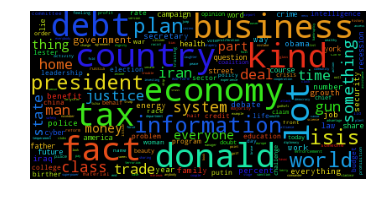

Trump word cloud:


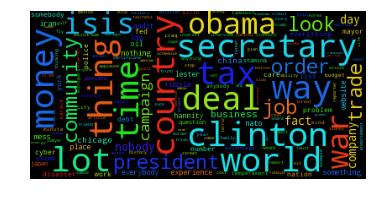

In [9]:
"""
    Function
    --------
    create_wordcloud
    
    Plots a wordcloud of a candidate's most used nouns

    Inputs
    ------
    text : str
        The normalized debate speech of a candidate
"""

#Using part of speech tagging to extract the nouns from the speeches 
def create_wordcloud(text):
    ap_tagger = PerceptronTagger()
    b1 = tb(text.decode('utf-8').strip(), pos_tagger = ap_tagger)
    noun_words = {}
    for word, pos in b1.tags:
        if word not in stopwords.words('english') and pos == 'NN':
            noun_words[word] = noun_words.get(word, 0) + 1
    wordcloud = WordCloud(max_font_size=40).generate_from_frequencies(noun_words.items())
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
print("Clinton word cloud:")
create_wordcloud(clinton_text1)
print("Trump word cloud:")
create_wordcloud(trump_text1)

Debate 1:

Clinton:
total word count: 3130
unique word count: 1272
score: 0.406


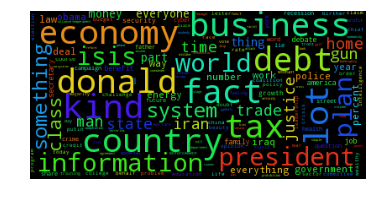

Trump:
total word count: 4147
unique word count: 1188
score: 0.286



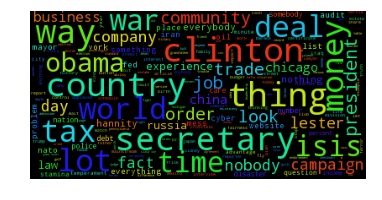

----------------------------------------------------------

Debate 2:

Clinton:
total word count: 3386
unique word count: 1253
score: 0.37


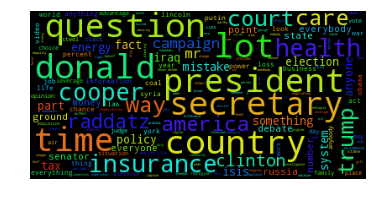

Trump:
total word count: 4643
unique word count: 1318
score: 0.284



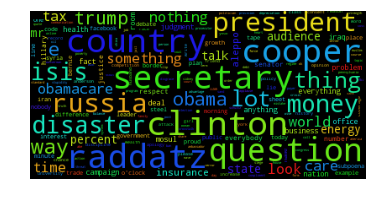

----------------------------------------------------------

Debate 3:

Clinton:
total word count: 3786
unique word count: 1395
score: 0.368


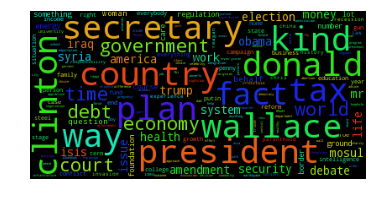

Trump:
total word count: 4386
unique word count: 1248
score: 0.285



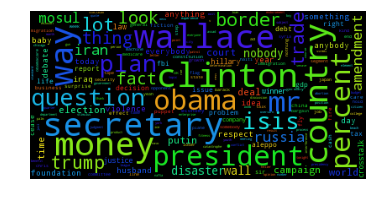

----------------------------------------------------------



In [10]:
#Let's do it for all the debates now

debatexml, debatetext, alltext, clinton_text, trump_text = [{} for i in range(5)]

for i in range(len(debate_urls)):
    debatexml[i] = get_debate_xml(debate_urls[i])
    debatetext[i] = get_debate_text(debatexml[i])
    alltext[i] = get_candidate_speech(debatetext[i])
    clinton_text[i] = normalize(alltext[i]['Clinton'])
    trump_text[i] = normalize(alltext[i]['Trump'])
    print('Debate ' + str(i+1) + ':')
    print('')
    print('Clinton:')
    vocabulary_score(clinton_text[i])
    create_wordcloud(clinton_text[i])
    print('Trump:')
    vocabulary_score(trump_text[i])
    print('')
    create_wordcloud(trump_text[i])
    print('----------------------------------------------------------')
    print('')

<b>Conclusions:</b>

From these three debates, it appears that Trump does not use better words than Hillary -- Hillary has a significantly higher score in all debates.  I find it interesting how Trump has a near-identical score across all three debates, while Hillary has a similar score between the second and third debate.  Only in the second debate does Trump have a higher unique word count compared to Hillary, though this is offset by how he has a substantially higher total word count.  The consistency in the scores reinforces the claim that Hillary has a wider range of vocabulary (or is more concise and to the point) compared to Trump.

The word clouds seem to do a decent job depicting the main topics in the debates -- one can just look at the word clouds and have a decent idea of what topics were discussed within a few seconds vs. reading/watching the debates, although the word clouds fail to capture anything else.  Key words that illustrate main topics include Obama's presidency, external affairs (ISIS, Russia, border), economics (trade, tax, economy), health insurance, and more.  

<b>Possible next steps:</b>

There's a lot more that can be done using the speeches in the debates to gain further insights.  For example, we see that Obama is one of the key words used between the two candidates.  We can extract sentences that include 'Obama' in them and implement sentiment analysis to deduce the candidates' opinion towards Obama (the results are obvious but that's just an example).  Another possible project would be to scrape tweets from twitter before, during, and after the debates and conduct sentiment analysis to gauge common opinion on the debates.